# Importing libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [28]:
# The code was removed by Watson Studio for sharing.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [29]:
LifeData=df.drop('Year',axis=1)  

# Analysing Data


In [30]:
(LifeData.describe())
LifeData.columns


# ##renaming the before spaced name column
LifeData.rename(columns={' thinness  1-19 years':'thinness  1-19 years',
                     ' thinness 5-9 years':'thinness 5-9 years',
                     ' HIV/AIDS':'HIV/AIDS',
                      ' BMI ':'BMI'},inplace=True)

LifeData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Country                            2938 non-null object
Status                             2938 non-null int64
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null float64
GDP                                2490 non-nul

# Visualizing Data

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


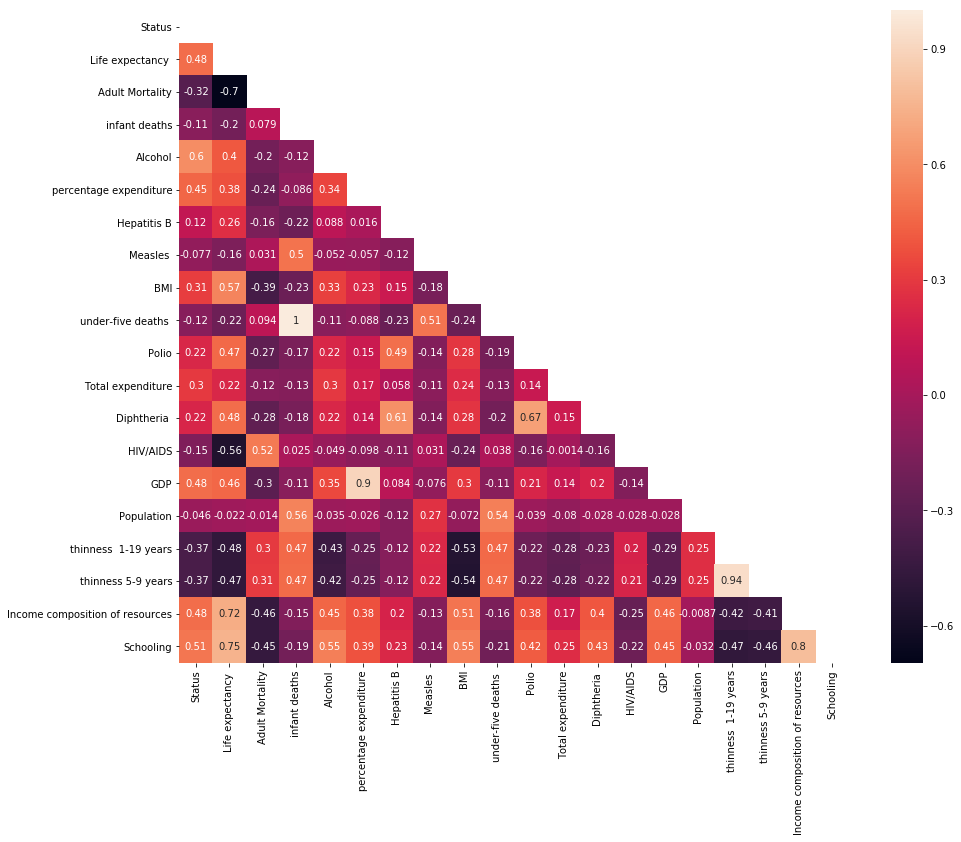

In [31]:
plt.figure(figsize = (15, 12))
matrix = np.triu(LifeData.corr())
sns.heatmap(LifeData.corr(), annot=True, mask=matrix)
LifeData.head()

# Changing categorical Column

In [32]:
LifeData = LifeData.groupby('Country').mean()
LifeData.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,0.0,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,0.0,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,0.0,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,0.0,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


# Making X & Y

In [33]:
LifeLabels = LifeData['Life expectancy ']
LifeFeatures = LifeData.drop('Life expectancy ', axis = 1)

# FILL MISSING VALUES

In [34]:
print(LifeFeatures.isnull().sum())
print(LifeLabels.isnull().sum())
LifeFeatures.fillna(value = LifeFeatures.mean(), inplace = True)
LifeLabels.fillna(value = LifeLabels.mean(), inplace = True)
print('--------------------------------------------------------')
print(LifeFeatures.isnull().sum())
print(LifeLabels.isnull().sum())



Status                              0
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
BMI                                 4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
HIV/AIDS                            0
GDP                                30
Population                         48
thinness  1-19 years                4
thinness 5-9 years                  4
Income composition of resources    17
Schooling                          13
dtype: int64
10
--------------------------------------------------------
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B         

# Feature Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
LifeFeatures = min_max_scaler.fit_transform(LifeFeatures)


LifeFeatures



array([[0.00000000e+00, 4.71121045e-01, 5.72552248e-02, ...,
        5.56004489e-01, 3.54720225e-01, 4.09856519e-01],
       [0.00000000e+00, 4.95235855e-02, 5.03041112e-04, ...,
        5.74635241e-02, 7.22960300e-01, 6.05739239e-01],
       [0.00000000e+00, 1.68333137e-01, 1.48625783e-02, ...,
        2.10998878e-01, 7.04204439e-01, 6.34435434e-01],
       ...,
       [0.00000000e+00, 3.63369015e-01, 2.88105364e-02, ...,
        4.90235690e-01, 4.29899969e-01, 4.24516532e-01],
       [0.00000000e+00, 6.31572756e-01, 2.44660905e-02, ...,
        2.39281706e-01, 4.58580807e-01, 5.59575795e-01],
       [0.00000000e+00, 8.34960593e-01, 1.94356793e-02, ...,
        2.47362514e-01, 3.84417005e-01, 4.90330630e-01]])

# Spliting into testing and training data



In [36]:
from sklearn.model_selection import train_test_split
LifeFeatures_train, LifeFeatures_test, LifeLabels_train, LifeLabels_test = train_test_split(
        LifeFeatures, LifeLabels, train_size = 0.7, test_size = 0.3)

# Model Training


In [37]:
from sklearn.ensemble import RandomForestRegressor
p=RandomForestRegressor(n_estimators=40,random_state=50)

p.fit(LifeFeatures_train,LifeLabels_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

# Errors


In [38]:
from sklearn import metrics

predictions = p.predict(LifeFeatures_test)
print('MAE',metrics.mean_absolute_error(LifeLabels_test,predictions))
print('MSE',metrics.mean_squared_error(LifeLabels_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(LifeLabels_test,predictions)))

MAE 1.4486239283022446
MSE 3.8108935354159947
RMSE 1.952151002206539


# Accuracy

In [39]:
metrics.explained_variance_score(LifeLabels_test,predictions)*100

93.51961413939729

In [40]:
df=pd.DataFrame({'Actual':LifeLabels_test, 'Predicted':predictions})
print(df.head(25))

                      Actual  Predicted
Country                                
Saudi Arabia        73.46875  75.967812
Estonia             74.94375  71.044368
Belarus             69.90625  68.930932
Mauritius           72.71250  71.320616
Myanmar             64.20000  65.008437
Poland              75.65000  76.432969
Philippines         67.57500  67.200000
Malawi              49.89375  51.865781
Maldives            75.53750  74.493438
Mali                54.93750  58.837969
Portugal            79.99375  78.565313
Costa Rica          78.59375  75.546719
Sweden              82.51875  81.221562
Russian Federation  67.76250  68.592031
Georgia             73.50625  73.943594
Cyprus              79.67500  79.126875
Nicaragua           73.45000  70.551554
Israel              81.30000  79.921250
Albania             75.15625  75.849687
Jamaica             74.29375  69.102031
Ireland             80.15000  81.438125
Afghanistan         58.19375  62.577809
Morocco             72.15625  72.653125


# Testing with custom inputs

In [ ]:
x=pd.DataFrame({'Status':[1],'Adult Mortality':[138], 'infant deaths':[1], 'Alcohol':[12.03],
       'percentage expenditure':[153.14], 'Hepatitis B':[95], 'Measles ':[0], 'BMI ':[65.1],
       'under-five deaths ':[1], 'Polio':[88], 'Total expenditure':[8.44], 'Diphtheria ':[88],
       'HIV/AIDS':[0.1], 'GDP':[7853.335], 'Population':[7223938], 'thinness  1-19 years':[1.9],
       'thinness 5-9 years':[1.9], 'Income composition of resources':[0.787], 'Schooling':[14.8],})
prediction=p.predict(x)
print(prediction)

# Creation of end-point



In [ ]:
!pip install watson-machine-learning-client

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [ ]:
wml_credentials={
  "apikey": "",
  "instance_id": "",
  "url": ""
}

In [ ]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [ ]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "@gmail.com", 
               client.repository.ModelMetaNames.NAME: "lifeExpectancy"}

In [ ]:
model_artifact =client.repository.store_model(p, meta_props=model_props)

In [ ]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [ ]:
published_model_uid

In [ ]:
deployment = client.deployments.create(published_model_uid, name="lifeExpectancy")

In [ ]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [ ]:
scoring_endpoint

In [ ]:
https://us-south.ml.cloud.ibm.com/v3/wml_instances/466a9b47-1657-4009-a824-fcce122b8f28/deployments/bf6fa95f-0d3b-41ee-9c72-0c16c18650de/online